# Linear Regression

We have advertisment data set for the analysis our aim is to analyze the data given and we must get the result that how much sales we will get after spending money in different medium

   #### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising_data.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [4]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,760
196,94.2,4.9,8.1,970
197,177.0,9.3,6.4,1280
198,283.6,42.0,66.2,2550
199,232.1,8.6,8.7,1340


## Exploratory Data Analysis

#### Checking for the null value in the data set

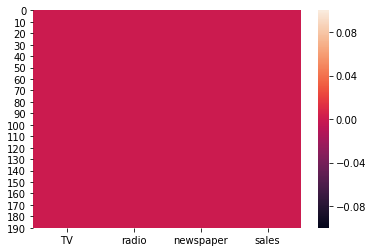

In [5]:
sns.heatmap(df.isnull())

from the above heat map we come to a conclusion that there is no null value in our data set 

#### Correlation

(4.0, 0.0)

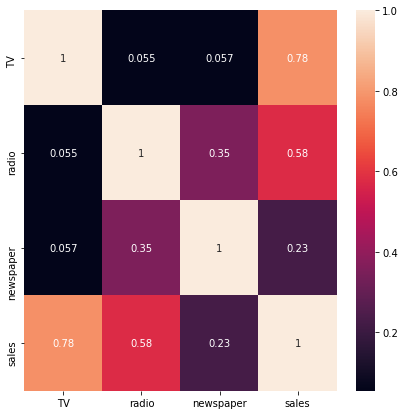

In [6]:
cm=df.corr()
fig= plt.subplots(figsize=(7,7))
size=sns.heatmap(cm,annot=True, linewidths=0)
#here we are using the below code to get the clear figure of thep heat map
bottom,top=size.get_ylim()
size.set_ylim(bottom+0.5,top-0.5)


from the above tabel we can come to a conclusion that tv is more associated feature with sales

#### Taking a one feature and label

In [7]:
x=df['TV'].values.reshape(-1,1)
y=df['sales'].values.reshape (-1,1)


#### Ploting the values of x and y using the  matplotlib

Text(0, 0.5, 'sales')

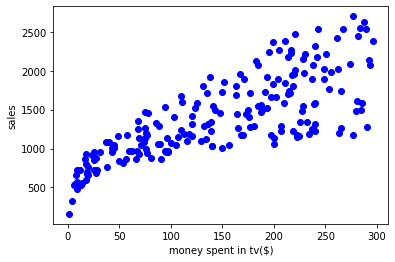

In [8]:
plt.scatter(x, y, c='blue')
plt.xlabel("money spent in tv($)")
plt.ylabel("sales")

#### Plotting the x and y value using the seaborn

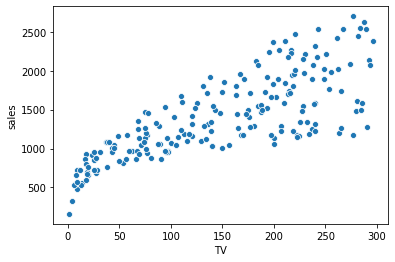

In [9]:
sns.scatterplot( x='TV', y='sales',data=df)

# linear regression

#### importing libraries spliting test and train set data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [11]:
n=len(x_train)
m=len(y_train)
print(n)
print(m)

160
160


#### Importing linear regression model and fiting it to our trainning data set

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Getting the best fit line 

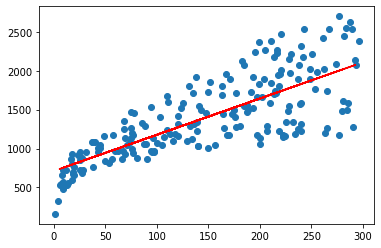

In [13]:
ypredict=reg.predict(x_test)
plt.scatter(x,y)
plt.plot(x_test,ypredict,color='red')
plt.show()

In [14]:
reg.coef_

array([[4.65297337]])

In [15]:
reg.intercept_

array([711.96384306])

In [16]:
output=reg.predict([[100]])

In [17]:
output

array([[1177.26118011]])

# Multiple linear regression

In [18]:
x= df.drop(['sales'], axis=1)
y=df['sales']. values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = multiple_reg.predict(x_test)

In [22]:
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 1000
Radio : 1000
Newspaper : 1000
you will get Rs23966.48 sales by advertising Rs1000.0 on TV, Rs1000.0 on Radio and Rs1000.0 on newspaper.
